### Introduction

An entrepreneur has hired us as a marketing research firm to find the best place within the city to establish a restaurant to serve the Hispanic/Latino community.


### Objective: Get the top 10 zip codes with hispanic population

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
import itertools
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = ('nyc_decennialcensusdata_2020_2010 edited.xlsx')#We tell the program where the data set is 
dataset = pd.read_excel(df, '2020 and 2010 Data')#We tell the program to read our data set file
dataset.head()#we tell the program to to show us the heads of our data 

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Total population,Population in households,...,Total persons under 18 years,Hispanic/Latino (of any race),White non-Hispanic,Black non-Hispanic,Asian non-Hispanic,"Some other race, non-Hispanic",Non-Hispanic of two or more races,Total housing units,Occupied housing units,Vacant housing units
0,2020.0,NTA2020,Bronx,BX0101,NaN,Mott Haven-Port Morris,NaN,0.0,57718.0,55423.0,...,15619.0,38852.0,1569.0,15455.0,476.0,475.0,891.0,21159.0,20224.0,935.0
1,2020.0,NTA2020,Bronx,BX0102,NaN,Melrose,NaN,0.0,42651.0,41461.0,...,11418.0,28059.0,973.0,12111.0,426.0,451.0,631.0,15481.0,15016.0,465.0
2,2020.0,NTA2020,Bronx,BX0201,NaN,Hunts Point,NaN,0.0,15131.0,14081.0,...,3988.0,10715.0,264.0,3752.0,108.0,109.0,183.0,5238.0,4988.0,250.0
3,2020.0,NTA2020,Bronx,BX0202,NaN,Longwood,NaN,0.0,40289.0,38597.0,...,10843.0,28773.0,690.0,9608.0,294.0,399.0,525.0,14417.0,13812.0,605.0
4,2020.0,NTA2020,Bronx,BX0291,NaN,North & South Brother Islands,NaN,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### note: the above file has been cleaned in excel to only show neighboorhoods while ignorings other designations such as boroughs, cities, etc. (original census data set: nyc_decennialcensusdata_2020_2010 (2).xlsx)

In [4]:
#Call the number of rows and columns
dataset.shape

(262, 23)

In [5]:
# Call the Column names, we care about 'Hispanic/Latino (of any race)'
dataset.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Total population',
       'Population in households', 'Population in group quarters',
       'Institutionalized population', 'Average household size',
       'Total persons under 18 years', 'Hispanic/Latino (of any race)',
       'White non-Hispanic', 'Black non-Hispanic', 'Asian non-Hispanic',
       'Some other race, non-Hispanic', 'Non-Hispanic of two or more races',
       'Total housing units', 'Occupied housing units',
       'Vacant housing units'],
      dtype='object')

In [6]:
#check data type
dataset.dtypes

Unnamed: 0                           float64
Unnamed: 1                            object
Unnamed: 2                            object
Unnamed: 3                            object
Unnamed: 4                           float64
Unnamed: 5                            object
Unnamed: 6                           float64
Unnamed: 7                           float64
Total population                     float64
Population in households             float64
Population in group quarters         float64
Institutionalized population         float64
Average household size               float64
Total persons under 18 years         float64
Hispanic/Latino (of any race)        float64
White non-Hispanic                   float64
Black non-Hispanic                   float64
Asian non-Hispanic                   float64
Some other race, non-Hispanic        float64
Non-Hispanic of two or more races    float64
Total housing units                  float64
Occupied housing units               float64
Vacant hou

In [7]:
dataset.isna().sum() #check if there's any missing values

Unnamed: 0                             0
Unnamed: 1                             0
Unnamed: 2                             0
Unnamed: 3                             0
Unnamed: 4                           262
Unnamed: 5                             0
Unnamed: 6                           262
Unnamed: 7                             0
Total population                       0
Population in households               0
Population in group quarters           0
Institutionalized population           0
Average household size                31
Total persons under 18 years           0
Hispanic/Latino (of any race)          0
White non-Hispanic                     0
Black non-Hispanic                     0
Asian non-Hispanic                     0
Some other race, non-Hispanic          0
Non-Hispanic of two or more races      0
Total housing units                    0
Occupied housing units                 0
Vacant housing units                   0
dtype: int64

In [8]:
dataset.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Total population,Population in households,...,Total persons under 18 years,Hispanic/Latino (of any race),White non-Hispanic,Black non-Hispanic,Asian non-Hispanic,"Some other race, non-Hispanic",Non-Hispanic of two or more races,Total housing units,Occupied housing units,Vacant housing units
0,2020.0,NTA2020,Bronx,BX0101,NaN,Mott Haven-Port Morris,NaN,0.0,57718.0,55423.0,...,15619.0,38852.0,1569.0,15455.0,476.0,475.0,891.0,21159.0,20224.0,935.0
1,2020.0,NTA2020,Bronx,BX0102,NaN,Melrose,NaN,0.0,42651.0,41461.0,...,11418.0,28059.0,973.0,12111.0,426.0,451.0,631.0,15481.0,15016.0,465.0
2,2020.0,NTA2020,Bronx,BX0201,NaN,Hunts Point,NaN,0.0,15131.0,14081.0,...,3988.0,10715.0,264.0,3752.0,108.0,109.0,183.0,5238.0,4988.0,250.0
3,2020.0,NTA2020,Bronx,BX0202,NaN,Longwood,NaN,0.0,40289.0,38597.0,...,10843.0,28773.0,690.0,9608.0,294.0,399.0,525.0,14417.0,13812.0,605.0
4,2020.0,NTA2020,Bronx,BX0291,NaN,North & South Brother Islands,NaN,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'''dataset['Hispanic/Latino (of any race)'] = dataset['Hispanic/Latino (of any race)'].astype(float, errors = 'raise')'''

In [9]:
dataset.dtypes

Unnamed: 0                           float64
Unnamed: 1                            object
Unnamed: 2                            object
Unnamed: 3                            object
Unnamed: 4                           float64
Unnamed: 5                            object
Unnamed: 6                           float64
Unnamed: 7                           float64
Total population                     float64
Population in households             float64
Population in group quarters         float64
Institutionalized population         float64
Average household size               float64
Total persons under 18 years         float64
Hispanic/Latino (of any race)        float64
White non-Hispanic                   float64
Black non-Hispanic                   float64
Asian non-Hispanic                   float64
Some other race, non-Hispanic        float64
Non-Hispanic of two or more races    float64
Total housing units                  float64
Occupied housing units               float64
Vacant hou

In [10]:
dataset.shape

(262, 23)

In [11]:
dataset.nlargest(10, 'Hispanic/Latino (of any race)')

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Total population,Population in households,...,Total persons under 18 years,Hispanic/Latino (of any race),White non-Hispanic,Black non-Hispanic,Asian non-Hispanic,"Some other race, non-Hispanic",Non-Hispanic of two or more races,Total housing units,Occupied housing units,Vacant housing units
170,2020.0,NTA2020,Queens,QN0301,NaN,Jackson Heights,NaN,0.0,101848.0,101315.0,...,18731.0,54270.0,15306.0,1602.0,27581.0,1255.0,1834.0,37428.0,35700.0,1728.0
174,2020.0,NTA2020,Queens,QN0402,NaN,Corona,NaN,0.0,73822.0,72899.0,...,17726.0,51530.0,3881.0,6072.0,10561.0,801.0,977.0,22216.0,21327.0,889.0
151,2020.0,NTA2020,Manhattan,MN1201,NaN,Washington Heights (South),NaN,0.0,72037.0,70158.0,...,10668.0,48447.0,10886.0,7641.0,2835.0,650.0,1578.0,28457.0,26956.0,1501.0
26,2020.0,NTA2020,Bronx,BX0901,NaN,Soundview-Bruckner-Bronx River,NaN,0.0,74342.0,73148.0,...,19153.0,46244.0,1610.0,18855.0,4293.0,1801.0,1539.0,26112.0,25020.0,1092.0
152,2020.0,NTA2020,Manhattan,MN1202,NaN,Washington Heights (North),NaN,0.0,71842.0,70109.0,...,11384.0,43832.0,20269.0,3182.0,2141.0,698.0,1720.0,30550.0,28949.0,1601.0
173,2020.0,NTA2020,Queens,QN0401,NaN,Elmhurst,NaN,0.0,107864.0,106794.0,...,20596.0,42599.0,5534.0,1617.0,55785.0,901.0,1428.0,35849.0,34105.0,1744.0
9,2020.0,NTA2020,Bronx,BX0401,NaN,Concourse-Concourse Village,NaN,0.0,69387.0,67193.0,...,16888.0,41807.0,1941.0,22108.0,1730.0,658.0,1143.0,25539.0,24599.0,940.0
0,2020.0,NTA2020,Bronx,BX0101,NaN,Mott Haven-Port Morris,NaN,0.0,57718.0,55423.0,...,15619.0,38852.0,1569.0,15455.0,476.0,475.0,891.0,21159.0,20224.0,935.0
21,2020.0,NTA2020,Bronx,BX0702,NaN,Bedford Park,NaN,0.0,55521.0,54690.0,...,12848.0,37854.0,3461.0,10310.0,2325.0,763.0,808.0,21029.0,20184.0,845.0
172,2020.0,NTA2020,Queens,QN0303,NaN,North Corona,NaN,0.0,43434.0,43028.0,...,11322.0,37491.0,559.0,2101.0,2542.0,428.0,313.0,11544.0,10955.0,589.0


In [12]:
# Clean data by deleting Unnamed: 0, Unnamed: 1, Unnamed: 3, Unnamed: 4, Unnamed: 6, Unnamed: 7, 'Total housing units', 'Occupied housing units', 'Vacant housing units'
dataset.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 6', 'Unnamed: 7', 'Total housing units', 'Occupied housing units', 'Vacant housing units'], axis=1, inplace=True)

In [13]:
dataset.head()

,Unnamed: 2,Unnamed: 5,Total population,Population in households,Population in group quarters,Institutionalized population,Average household size,Total persons under 18 years,Hispanic/Latino (of any race),White non-Hispanic,Black non-Hispanic,Asian non-Hispanic,"Some other race, non-Hispanic",Non-Hispanic of two or more races
0,Bronx,Mott Haven-Port Morris,57718.0,55423.0,2295.0,0.0,2.74,15619.0,38852.0,1569.0,15455.0,476.0,475.0,891.0
1,Bronx,Melrose,42651.0,41461.0,1190.0,36.0,2.76,11418.0,28059.0,973.0,12111.0,426.0,451.0,631.0
2,Bronx,Hunts Point,15131.0,14081.0,1050.0,6.0,2.82,3988.0,10715.0,264.0,3752.0,108.0,109.0,183.0
3,Bronx,Longwood,40289.0,38597.0,1692.0,144.0,2.79,10843.0,28773.0,690.0,9608.0,294.0,399.0,525.0
4,Bronx,North & South Brother Islands,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Rename columns
dataset.rename(columns={'Unnamed: 2': 'Borough', 'Unnamed: 5': 'Neighborhood'}, inplace=True)
dataset.head(5)

,Borough,Neighborhood,Total population,Population in households,Population in group quarters,Institutionalized population,Average household size,Total persons under 18 years,Hispanic/Latino (of any race),White non-Hispanic,Black non-Hispanic,Asian non-Hispanic,"Some other race, non-Hispanic",Non-Hispanic of two or more races
0,Bronx,Mott Haven-Port Morris,57718.0,55423.0,2295.0,0.0,2.74,15619.0,38852.0,1569.0,15455.0,476.0,475.0,891.0
1,Bronx,Melrose,42651.0,41461.0,1190.0,36.0,2.76,11418.0,28059.0,973.0,12111.0,426.0,451.0,631.0
2,Bronx,Hunts Point,15131.0,14081.0,1050.0,6.0,2.82,3988.0,10715.0,264.0,3752.0,108.0,109.0,183.0
3,Bronx,Longwood,40289.0,38597.0,1692.0,144.0,2.79,10843.0,28773.0,690.0,9608.0,294.0,399.0,525.0
4,Bronx,North & South Brother Islands,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
dataset.shape

(262, 14)

In [16]:
dataset.dropna(inplace=True)

In [17]:
dataset.shape

(231, 14)

In [18]:
dataset2 = dataset.nlargest(10, 'Hispanic/Latino (of any race)')
dataset2

,Borough,Neighborhood,Total population,Population in households,Population in group quarters,Institutionalized population,Average household size,Total persons under 18 years,Hispanic/Latino (of any race),White non-Hispanic,Black non-Hispanic,Asian non-Hispanic,"Some other race, non-Hispanic",Non-Hispanic of two or more races
170,Queens,Jackson Heights,101848.0,101315.0,533.0,243.0,2.84,18731.0,54270.0,15306.0,1602.0,27581.0,1255.0,1834.0
174,Queens,Corona,73822.0,72899.0,923.0,531.0,3.42,17726.0,51530.0,3881.0,6072.0,10561.0,801.0,977.0
151,Manhattan,Washington Heights (South),72037.0,70158.0,1879.0,244.0,2.60,10668.0,48447.0,10886.0,7641.0,2835.0,650.0,1578.0
26,Bronx,Soundview-Bruckner-Bronx River,74342.0,73148.0,1194.0,175.0,2.92,19153.0,46244.0,1610.0,18855.0,4293.0,1801.0,1539.0
152,Manhattan,Washington Heights (North),71842.0,70109.0,1733.0,647.0,2.42,11384.0,43832.0,20269.0,3182.0,2141.0,698.0,1720.0
173,Queens,Elmhurst,107864.0,106794.0,1070.0,275.0,3.13,20596.0,42599.0,5534.0,1617.0,55785.0,901.0,1428.0
9,Bronx,Concourse-Concourse Village,69387.0,67193.0,2194.0,652.0,2.73,16888.0,41807.0,1941.0,22108.0,1730.0,658.0,1143.0
0,Bronx,Mott Haven-Port Morris,57718.0,55423.0,2295.0,0.0,2.74,15619.0,38852.0,1569.0,15455.0,476.0,475.0,891.0
21,Bronx,Bedford Park,55521.0,54690.0,831.0,0.0,2.71,12848.0,37854.0,3461.0,10310.0,2325.0,763.0,808.0
172,Queens,North Corona,43434.0,43028.0,406.0,0.0,3.93,11322.0,37491.0,559.0,2101.0,2542.0,428.0,313.0


In [19]:
# This did not work: dataset.set_index('Borough', 'Neighborhood')

# The following did not work to help sum rows.
# Set Borough and Zip Code as index to be able to concatenate the numbers for the rest of the table. # Columns were arranged alphabetically.
# dataset2 = pd.pivot_table(dataset, index=['Borough', 'Neighborhood'])
# dataset2.head()

In [20]:
# a = dataset[dataset['Neighborhood'] == 'Washington Heights (South)']
# b = dataset[dataset['Neighborhood'] == 'Washington Heights (North)']
# Merge won't work. # pd.merge(a, b, on = 'Neighborhood', how='left')
# dataset.sum()

In [21]:
dataset3 = dataset2[['Borough', 'Neighborhood', 'Total population', 'Average household size', 'Total persons under 18 years', 'Total persons under 18 years', 'Hispanic/Latino (of any race)', 'White non-Hispanic', 'Black non-Hispanic', 'Asian non-Hispanic', 'Some other race, non-Hispanic', 'Non-Hispanic of two or more races'
                    ]]
dataset3.head()

,Borough,Neighborhood,Total population,Average household size,Total persons under 18 years,Total persons under 18 years,Hispanic/Latino (of any race),White non-Hispanic,Black non-Hispanic,Asian non-Hispanic,"Some other race, non-Hispanic",Non-Hispanic of two or more races
170,Queens,Jackson Heights,101848.0,2.84,18731.0,18731.0,54270.0,15306.0,1602.0,27581.0,1255.0,1834.0
174,Queens,Corona,73822.0,3.42,17726.0,17726.0,51530.0,3881.0,6072.0,10561.0,801.0,977.0
151,Manhattan,Washington Heights (South),72037.0,2.60,10668.0,10668.0,48447.0,10886.0,7641.0,2835.0,650.0,1578.0
26,Bronx,Soundview-Bruckner-Bronx River,74342.0,2.92,19153.0,19153.0,46244.0,1610.0,18855.0,4293.0,1801.0,1539.0
152,Manhattan,Washington Heights (North),71842.0,2.42,11384.0,11384.0,43832.0,20269.0,3182.0,2141.0,698.0,1720.0


In [22]:
# Total sum of values for two 'Washington Heights' neighborhoods.
a = dataset3[dataset3['Neighborhood'] == 'Washington Heights (South)']
b = dataset3[dataset3['Neighborhood'] == 'Washington Heights (North)']
washington_heights = a.append(b)
washington_heights.sum()

Borough                                                             ManhattanManhattan
Neighborhood                         Washington Heights (South)Washington Heights (...
Total population                                                              143879.0
Average household size                                                            5.02
Total persons under 18 years                                                   22052.0
Total persons under 18 years                                                   22052.0
Hispanic/Latino (of any race)                                                  92279.0
White non-Hispanic                                                             31155.0
Black non-Hispanic                                                             10823.0
Asian non-Hispanic                                                              4976.0
Some other race, non-Hispanic                                                   1348.0
Non-Hispanic of two or more races          

In [23]:
washington_heights.sum().tolist()

['ManhattanManhattan',
 'Washington Heights (South)Washington Heights (North)',
 143879.0,
 5.02,
 22052.0,
 22052.0,
 92279.0,
 31155.0,
 10823.0,
 4976.0,
 1348.0,
 3298.0]

In [24]:
# Fixing the 'Washington Heights' neighborhood value by combining the north and south location values.

# The following code is not working.
# dataset3.replace(to_replace = ['Manhattan', 'Washington Heights (South)', 72037.0, 2.60, 10668.0, 10668.0, 48447.0, 10886.0, 7641.0, 2835.0, 650.0, 1578.0]
#                 , value = ['Manhattan', 'Washington Heights', 143879.0, 5.02, 22052.0, 22052.0, 92279.0, 31155.0, 10823.0, 4976.0, 1348.0, 3298.0])
# dataset3

In [25]:
# Top 3 Highest Hispanic Populated Neighborhoods.
# dataset3.head(3)

In [26]:
d = dataset3[dataset3['Neighborhood'] == 'Jackson Heights']
e = dataset3[dataset3['Neighborhood'] == 'Corona']
f = washington_heights.sum()
d.append(e).append(f, ignore_index=True)

,Borough,Neighborhood,Total population,Average household size,Total persons under 18 years,Total persons under 18 years,Hispanic/Latino (of any race),White non-Hispanic,Black non-Hispanic,Asian non-Hispanic,"Some other race, non-Hispanic",Non-Hispanic of two or more races
0,Queens,Jackson Heights,101848.0,2.84,18731.0,18731.0,54270.0,15306.0,1602.0,27581.0,1255.0,1834.0
1,Queens,Corona,73822.0,3.42,17726.0,17726.0,51530.0,3881.0,6072.0,10561.0,801.0,977.0
2,ManhattanManhattan,Washington Heights (South)Washington Heights (...,143879.0,5.02,22052.0,22052.0,92279.0,31155.0,10823.0,4976.0,1348.0,3298.0


# Top 3 Hispanic Neighborhoods.

In [27]:
# Fixing the 'Washington Heights' neighborhood value by combining the north & south Washington Height values.
# Top 3 Highest Hispanic Populated Neighborhoods.
top3_hisp_neighborhoods = d.append(e).append(f, ignore_index=True).replace(to_replace=['ManhattanManhattan', 'Washington Heights (South)Washington Heights (North)', 143879.0, 5.02, 22052.0, 22052.0, 92279.0, 31155.0, 10823.0, 4976.0, 1348.0, 3298.0], value=['Manhattan', 'Washington Heights', 143879.0, 5.02, 22052.0, 22052.0, 92279.0, 31155.0, 10823.0, 4976.0, 1348.0, 3298.0]).sort_values(by=['Total population'], ascending=False)
top3_hisp_neighborhoods

,Borough,Neighborhood,Total population,Average household size,Total persons under 18 years,Total persons under 18 years,Hispanic/Latino (of any race),White non-Hispanic,Black non-Hispanic,Asian non-Hispanic,"Some other race, non-Hispanic",Non-Hispanic of two or more races
2,Manhattan,Washington Heights,143879.0,5.02,22052.0,22052.0,92279.0,31155.0,10823.0,4976.0,1348.0,3298.0
0,Queens,Jackson Heights,101848.0,2.84,18731.0,18731.0,54270.0,15306.0,1602.0,27581.0,1255.0,1834.0
1,Queens,Corona,73822.0,3.42,17726.0,17726.0,51530.0,3881.0,6072.0,10561.0,801.0,977.0


Text(0.5, 0, 'Neighborhood')

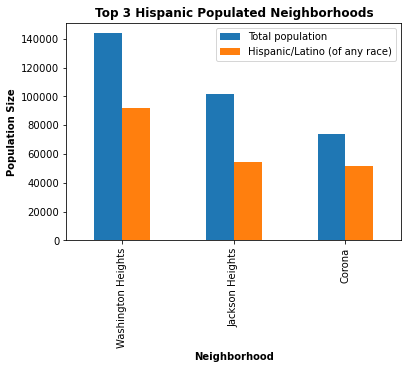

In [28]:
# Plot bar chart of top 3 hispanic populated neighborhoods.
# top3_hisp_neighborhoods.plot.bar(x='Neighborhood', y='Total population')
top3_hisp_neighborhoods.plot(x='Neighborhood', y= ['Total population', 'Hispanic/Latino (of any race)'], kind='bar')
plt.title('Top 3 Hispanic Populated Neighborhoods', fontweight='bold')
plt.ylabel('Population Size', fontweight='bold')
plt.xlabel('Neighborhood', fontweight='bold')

In [29]:
# top3_hisp_neighborhoods.set_index('Borough')
# pd.pivot_table(top3_hisp_neighborhoods, index=['Borough', 'Neighborhood'])

In [32]:
# tophisp_pie_label = ["", "", "", "", "", ""]
# labels = tophisp_pie_label
# top3_hisp_neighborhoods.drop()

# The following code does not work to build pie chart.
# top3_hisp_neighborhoods.drop(['Borough', 'Neighborhood'],axis=1, inplace=True)
# plt.title('Top 3 Hispanic Populated Neighborhoods', fontweight = 'bold')
# plt.pie(top3_hisp_neighborhoods, autopct='%.1f%%')
# plt.show()